In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()
# Combine the data into a single dataset
merge_data = pd.merge(city_df,ride_df, on = "city")
# Display the data table for preview
merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

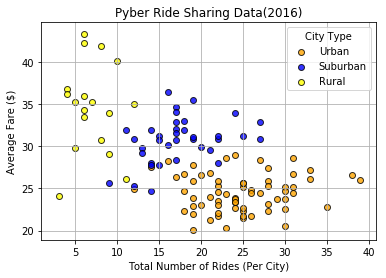

In [53]:
# Obtain the x and y coordinates for each of the three city types
#urban_data = merge_data.loc[merge_data["type"] == "Urban",:]

urban_data = merge_data[merge_data["type"] == "Urban"]
urban_data_city = urban_data.groupby("city")
avg_urban = urban_data_city.mean()["fare"]
ride_urban = urban_data_city.count()["ride_id"]
count_urban_drivers = urban_data_city.count()["driver_count"]

suburban_data = merge_data.loc[merge_data["type"] == "Suburban",:]
suburban_data_city = suburban_data.groupby("city")
avg_suburban = suburban_data_city.mean()["fare"]
ride_suburban = suburban_data_city.count()["ride_id"]

rural_data = merge_data.loc[merge_data["type"] == "Rural",:]
rural_data_city = rural_data.groupby("city")
avg_rural = rural_data_city.mean()["fare"]
ride_rural = rural_data_city.count()["ride_id"]

# Build the scatter plots for each city types
plt.scatter(ride_urban,avg_urban,marker="o", facecolors="orange",label="Urban",edgecolors="black",alpha=0.8)
plt.scatter(ride_suburban,avg_suburban,marker="o", facecolors="blue",label = "Suburban",edgecolors="black",alpha=0.8)
plt.scatter(ride_rural,avg_rural,marker="o", facecolors="yellow",label = "Rural",edgecolors="black",alpha=0.8)
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
txt = "Note:\nCircle size correlates with driver count per city"

# Create a legend
plt.legend(title="City Type")
# Incorporate a text label regarding circle size

# Save Figure


In [14]:
# Show plot
plt.show()

## Total Fares by City Type

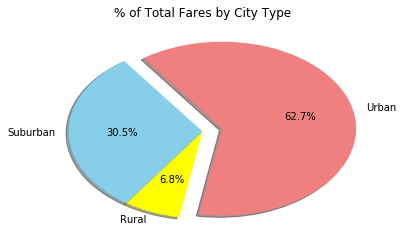

In [20]:
# Calculate Type Percents
total_urban = urban_data.sum()["fare"]
total_suburban = suburban_data.sum()["fare"]
total_rural = rural_data.sum()["fare"]

numbers = [total_urban,total_suburban,total_rural]
explode = (0.15, 0, 0,)
colors = ["lightcoral","skyblue","yellow"]
labels = ["Urban","Suburban","Rural"]
# Build Pie Chart
plt.pie(numbers,explode=explode,colors=colors,autopct="%1.1f%%",shadow = True,startangle =260, labels=labels)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('fares_by_city.png')

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

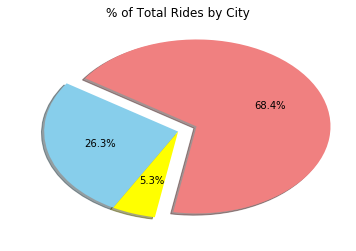

In [19]:
# Calculate Ride Percents
total_urban = urban_data.count()["ride_id"]
total_suburban = suburban_data.count()["ride_id"]
total_rural = rural_data.count()["ride_id"]

numbers = [total_urban,total_suburban,total_rural]
explode = (0.15, 0, 0,)
colors = ["lightcoral","skyblue","yellow"]
# Build Pie Chart
plt.pie(numbers,explode=explode,colors=colors,autopct="%1.1f%%",shadow = True,startangle =260)
plt.title("% of Total Rides by City")
# Save Figure
plt.savefig('rides_by_city.png')


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

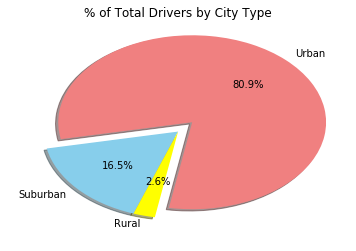

In [18]:
# # Calculate Ride Percents
# total_urban = urban_data.sum()["driver_count"]
# total_suburban = suburban_data.sum()["driver_count"]
# total_rural = rural_data.sum()["driver_count"]

# numbers = [total_urban,total_suburban,total_rural]
# explode = (0.15, 0, 0,)
# colors = ["lightcoral","skyblue","yellow"]
# # Build Pie Chart
# plt.pie(numbers,explode=explode,colors=colors,autopct="%1.1f%%",shadow = True,startangle =260)
# plt.title("% of Total Rides by City")
# # Save Figure



# Calculate Driver Percents

total = merge_data["driver_count"].sum()
urban = urban_data.drop_duplicates(subset = ["city"])
urban_sum = urban["driver_count"].sum()

total = merge_data["driver_count"].sum()
suburban = suburban_data.drop_duplicates(subset = ["city"])
suburban_sum = suburban["driver_count"].sum()


total = merge_data["driver_count"].sum()
rural = rural_data.drop_duplicates(subset = ["city"])
rural_sum = rural["driver_count"].sum()

# count_urban = urban_data["driver_count"].sum()
# count_urban
# count_suburban = suburban_data["driver_count"].sum()
# count_rural = rural_data["driver_count"].sum()
drivers_by_city = [urban_sum,suburban_sum,rural_sum]
explode = (0.15, 0, 0,)
colors = ["lightcoral","skyblue","yellow"]
labels = ["Urban","Suburban","Rural"]
# Build Pie Charts
plt.pie(drivers_by_city,explode=explode,colors=colors,autopct="%1.1f%%",shadow = True,startangle =260,labels=labels)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('driver_by_city.png')

In [ ]:
# Show Figure
plt.show()